In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

### Load the Dataset

In [4]:
df = pd.read_csv('50_Startups.csv')
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.shape

(50, 5)

In [8]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


### Data Preprocessing

In [10]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [14]:
df

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False
5,131876.90,99814.71,362861.36,156991.12,False,True
6,134615.46,147198.87,127716.82,156122.51,False,False
7,130298.13,145530.06,323876.68,155752.60,True,False
8,120542.52,148718.95,311613.29,152211.77,False,True
9,123334.88,108679.17,304981.62,149759.96,False,False


In [11]:
df.isnull().sum() # check null values

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [12]:
# Convert Categorical Feature (State) into Numeric using One-Hot Encoding  
df = pd.get_dummies(df, columns=['State'], drop_first=True)  

In [13]:
df

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False
5,131876.90,99814.71,362861.36,156991.12,False,True
6,134615.46,147198.87,127716.82,156122.51,False,False
7,130298.13,145530.06,323876.68,155752.60,True,False
8,120542.52,148718.95,311613.29,152211.77,False,True
9,123334.88,108679.17,304981.62,149759.96,False,False


In [15]:
# Define Features (X) and Target (y)  
X = df.drop('Profit', axis=1)  
y = df['Profit']  

In [17]:
X

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,True,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,True,False
5,131876.90,99814.71,362861.36,False,True
6,134615.46,147198.87,127716.82,False,False
7,130298.13,145530.06,323876.68,True,False
8,120542.52,148718.95,311613.29,False,True
9,123334.88,108679.17,304981.62,False,False


In [19]:
y

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64

In [20]:
# Split Data  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

In [21]:
# Train Model  
model = LinearRegression()  
model.fit(X_train, y_train)  

LinearRegression()

In [22]:
# Make Predictions  
y_pred = model.predict(X_test)  

In [23]:
# Evaluate Model  
mae = mean_absolute_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  

In [25]:
mae

6961.477813252384

In [26]:
r2

0.8987266414328636

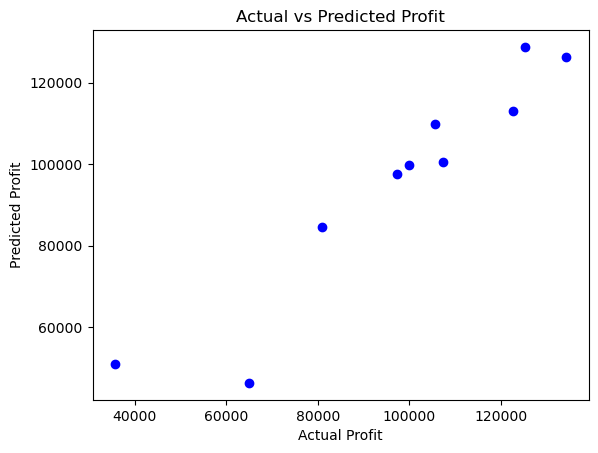

In [27]:
# Plot Actual vs Predicted Profits  
plt.scatter(y_test, y_pred, color='blue')  
plt.xlabel("Actual Profit")  
plt.ylabel("Predicted Profit")  
plt.title("Actual vs Predicted Profit")  
plt.show()